# Social Media Sentiment Analysis

### Installing textblob

In [5]:
!pip install textblob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   - ------------------------------------- 30.7/626.3 kB 186.2 kB/s eta 0:00:04
   - ------------------------------------- 30.7/626.3 kB 186.2 kB/s eta 0:00:04
   -- ------------------------------------ 41.0/626.3 kB 196.9 kB/s eta 0:00:03
   -- ------------------------------------ 41.0/626.3 kB 196.9 kB/s eta 0:00:03
   ----- --------------------------------- 81.9/626.3 kB 255.1 kB/s eta 0:00:03
   ----- --------------------------------- 81.9/626.3 kB 255.1 kB/s eta 0:00:03
   ----- --------------------------------- 81.9/626.3 kB 255.1 kB/s eta 0:00:03
   ------ ------------------------------- 112.6/626.3 kB 261.9 kB/s eta 0:00:02
   -------- ----------------------------- 133.1/626.3 kB 280.5 kB/s eta 0:

### Import necessary libraries

In [48]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset

In [54]:
df = pd.read_csv('twitter_data.csv')

### DataStructure and content

In [56]:
# Explore the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  21 non-null     float64
 1   id          21 non-null     float64
 2   tweet       21 non-null     object 
dtypes: float64(2), object(1)
memory usage: 1.1+ KB
None


In [65]:
df.columns

Index(['Unnamed: 0', 'id', 'tweet'], dtype='object')

In [67]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,21.0,10.0,6.204837,0.0,5.0,10.0,15.0,20.0
id,21.0,31973.0,6.204837,31963.0,31968.0,31973.0,31978.0,31983.0


### Print the columns to identify the correct column name

In [69]:
print("Columns in the CSV file:", df.columns)

Columns in the CSV file: Index(['Unnamed: 0', 'id', 'tweet'], dtype='object')


In [71]:
column_name = 'tweet' 

### Cleaning the Data

In [77]:
df = df.dropna(subset=[column_name])  # Remove rows where the tweet column is NaN
df[column_name] = df[column_name].astype(str)  # Ensure all entries are string

### Preprocess and Analyzing Sentiment

In [23]:
def preprocess_and_analyze(tweet):
    # Remove any unwanted characters, links, etc.
    tweet = tweet.lower()
    tweet = ' '.join(word for word in tweet.split() if not word.startswith('http'))
    tweet = ' '.join(word for word in tweet.split() if word.isalpha())
    return tweet, TextBlob(tweet).sentiment.polarity

### Apply preprocess and Sentiment analysis

In [25]:
df['Cleaned_Tweet'], df['Polarity'] = zip(*df[column_name].apply(preprocess_and_analyze))

### Classifying te Polarity

In [27]:
def classify_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [29]:
df['Sentiment'] = df['Polarity'].apply(classify_sentiment)

### Storing the analysis

In [31]:
df.to_csv('tweets_with_sentiment.csv', index=False)

In [33]:
print(df.head())

   Unnamed: 0       id                                              tweet  \
1         0.0  31963.0           #studiolife #aislife #requires #passion…   
3         1.0  31964.0              something inside me dies õ¿ eyes nes…   
5         2.0  31965.0   @user #white #supremacists want everyone to s...   
7         3.0  31966.0     safe ways to heal your #acne!! #altwaystohe...   
9         4.0  31967.0  is the hp and the cursed child book up for res...   

                                Cleaned_Tweet  Polarity Sentiment  
1                                                   0.0   Neutral  
3               something inside me dies eyes       0.0   Neutral  
5                            want everyone to       0.0   Neutral  
7                      safe ways to heal your       0.5  Positive  
9  is the hp and the cursed child book up for       0.0   Neutral  


In [35]:
sentiment_counts = df['Sentiment'].value_counts()

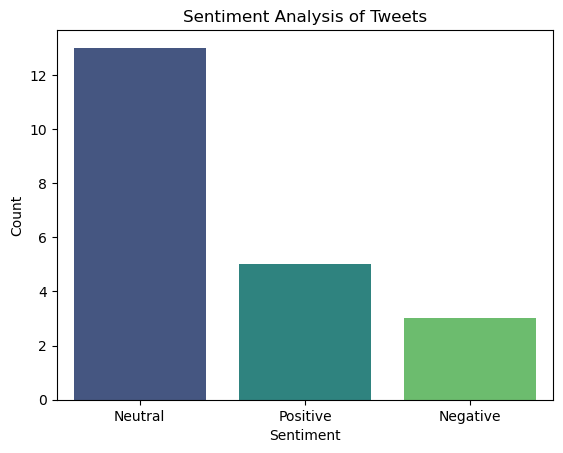

In [37]:
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Analysis of Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()